In [ ]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

print(f'cluster{kmeans.labels_}')
print(f'중심점: {kmeans.cluster_centers_}')
#print(kmeans.n_iter_)
print(f'응집도: {kmeans.inertia_}')
kmeans.score(X)

cluster[0 0 0 1 1 1]
중심점: [[ 1.  2.]
 [10.  2.]]
응집도: 16.0


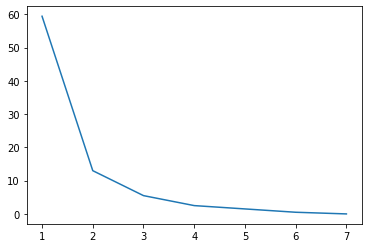

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

fruit = np.array([[3, 4], [1, 5], [7, 9],[5, 4], [6, 8], [2, 3],[4,4]])
temp=[]
for i in range(1,8):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(fruit)
  temp.append(kmeans.inertia_)
plt.plot(range(1,8),temp)

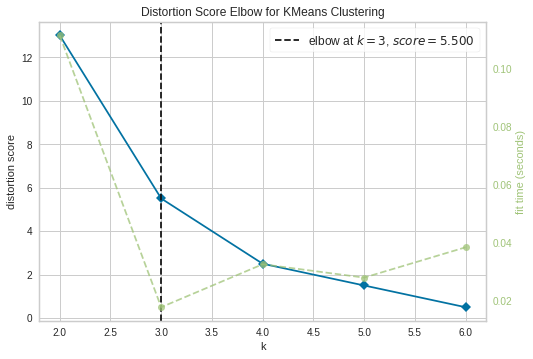

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
fruit = np.array([[3, 4], [1, 5], [7, 9],[5, 4], [6, 8], [2, 3],[4,4]])

visualizer = KElbowVisualizer(KMeans(), k=(2,7))
visualizer.fit(fruit) 
visualizer.show() 

Text(0, 0.5, 'sweet taste')

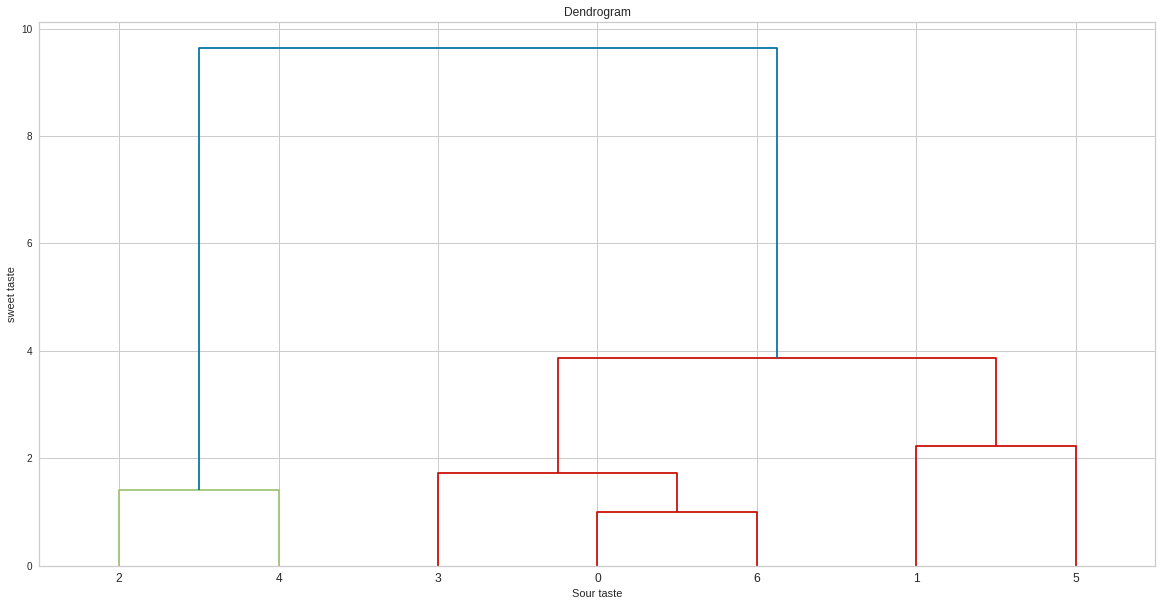

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
fruit = np.array([[3, 4], [1, 5], [7, 9],[5, 4], [6, 8], [2, 3],[4,4]])
plt.figure(figsize=(20,10))
cluster=linkage(fruit,method='ward')

dendrogram(cluster)
plt.title('Dendrogram')
plt.xlabel('Sour taste')
plt.ylabel('sweet taste')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
fruit = np.array([[3, 4], [1, 5], [7, 9],[5, 4], [6, 8], [2, 3],[4,4]])
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(fruit) 

array([0, 0, 1, 0, 1, 0, 0])

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot of Age')

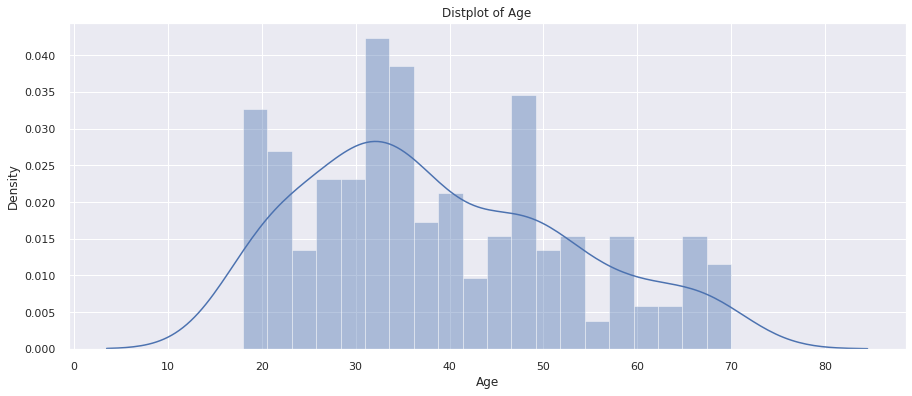

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 6))
sns.distplot(df['Age'] , bins = 20)
plt.title('Distplot of Age')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot of Annual Income (k$)')

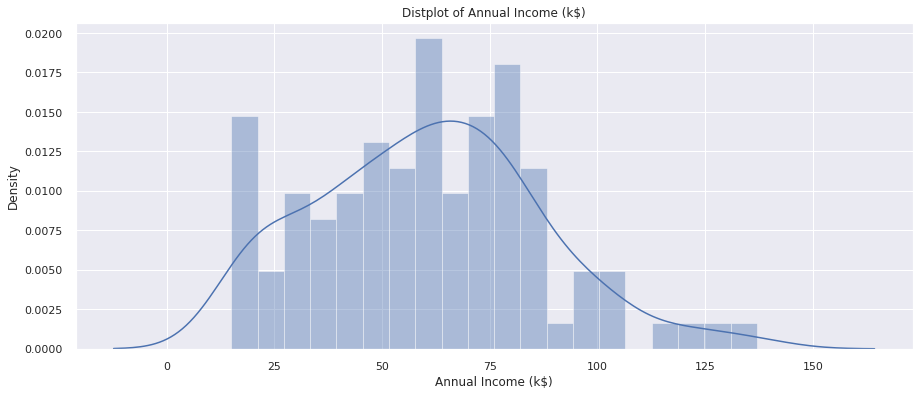

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 6))
sns.distplot(df['Annual Income (k$)'] , bins = 20)
plt.title('Distplot of Annual Income (k$)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot of Spending Score')

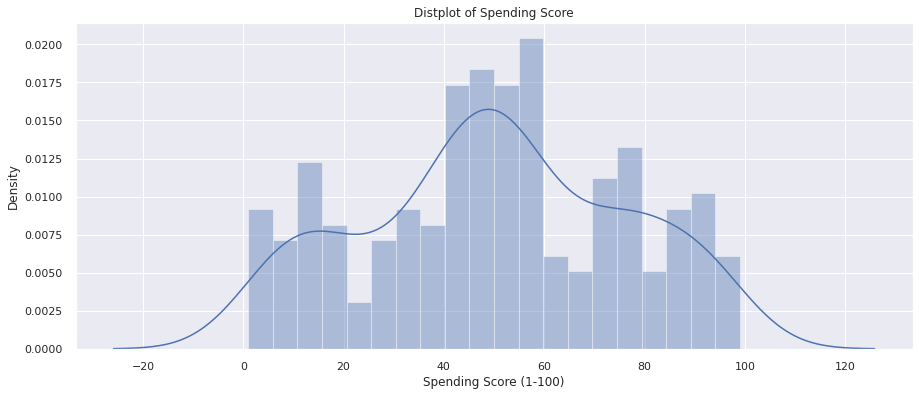

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 6))
sns.distplot(df['Spending Score (1-100)'] , bins = 20)
plt.title('Distplot of Spending Score')

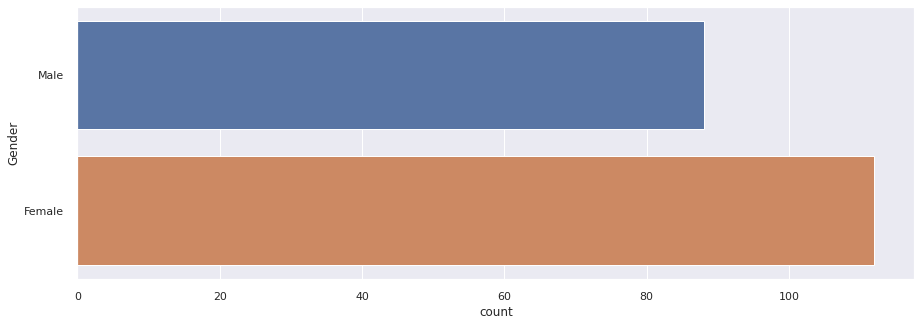

In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)

In [ ]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [ ]:
112/200

0.56

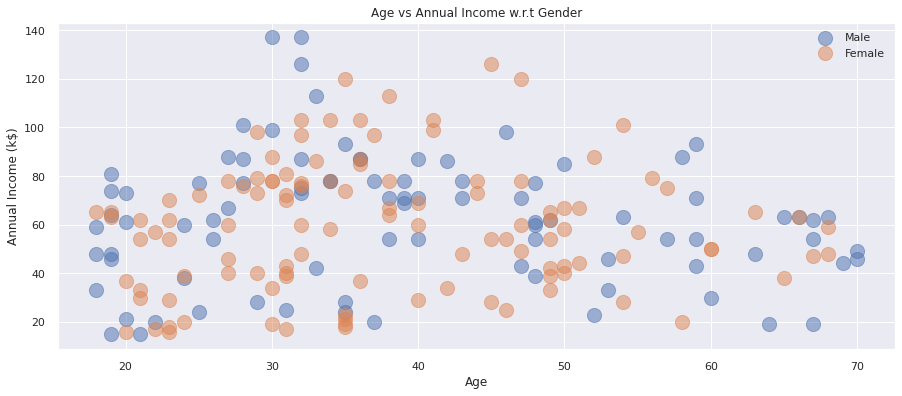

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()

In [ ]:
df.groupby('Gender')[['Age','Annual Income (k$)']].agg(['mean'])


,Age,Annual Income (k$)
,mean,mean
Gender,,
Female,38.098214,59.250000
Male,39.806818,62.227273


Text(0, 0.5, 'Gender')

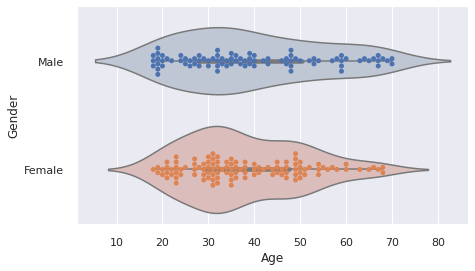

In [ ]:
plt.figure(1 , figsize = (7 , 4))

sns.violinplot(x = 'Age' , y = 'Gender' , data = df , palette = 'vlag')
sns.swarmplot(x = 'Age' , y = 'Gender' , data = df)
plt.ylabel('Gender')

Text(0, 0.5, 'Gender')

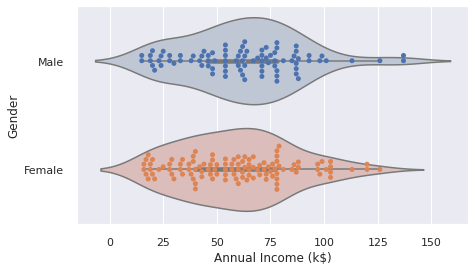

In [ ]:
plt.figure(1 , figsize = (7 , 4))

sns.violinplot(x = 'Annual Income (k$)' , y = 'Gender' , data = df , palette = 'vlag')
sns.swarmplot(x = 'Annual Income (k$)' , y = 'Gender' , data = df)
plt.ylabel('Gender')

Text(0, 0.5, 'Gender')

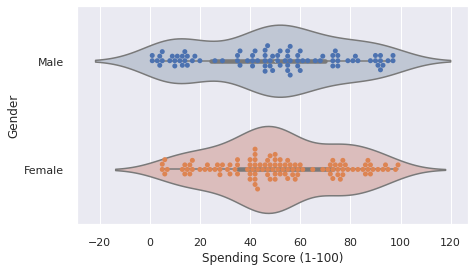

In [ ]:
plt.figure(1 , figsize = (7 , 4))

sns.violinplot(x = 'Spending Score (1-100)' , y = 'Gender' , data = df , palette = 'vlag')
sns.swarmplot(x = 'Spending Score (1-100)' , y = 'Gender' , data = df)
plt.ylabel('Gender')

In [ ]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  RuntimeWarning,


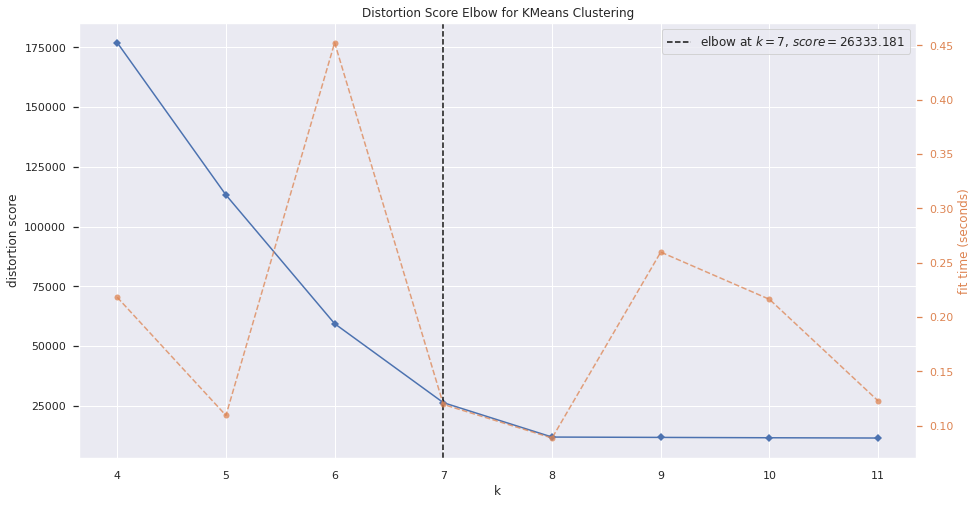

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

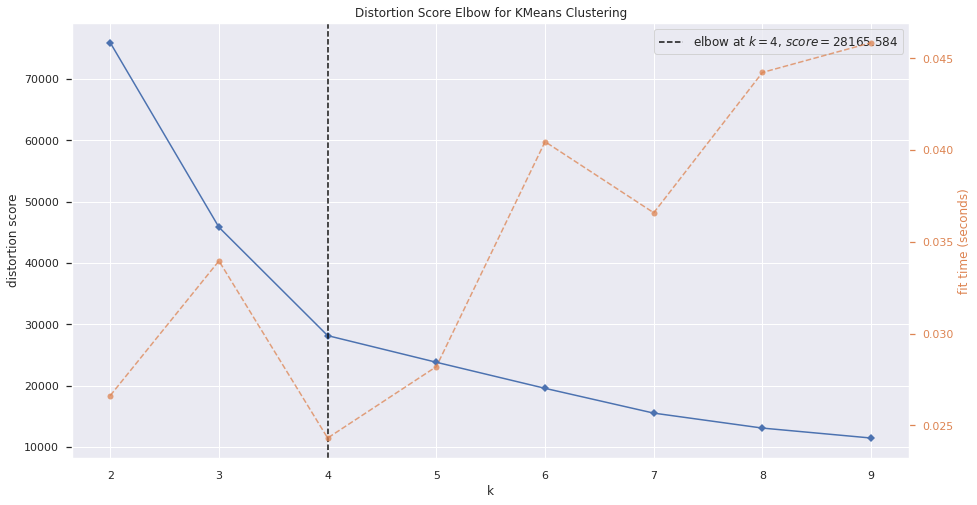

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

data= df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show() 

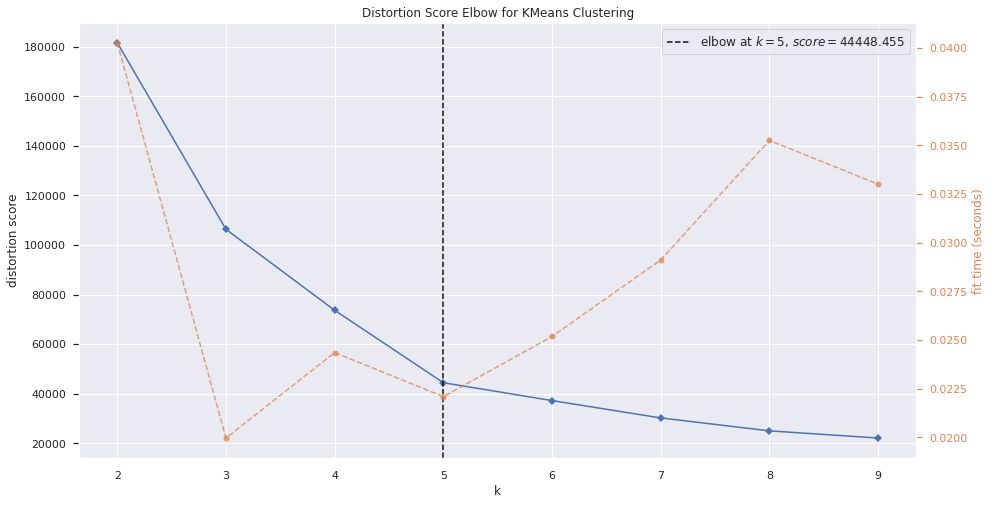

In [ ]:

data=df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(data)
visualizer.show() 

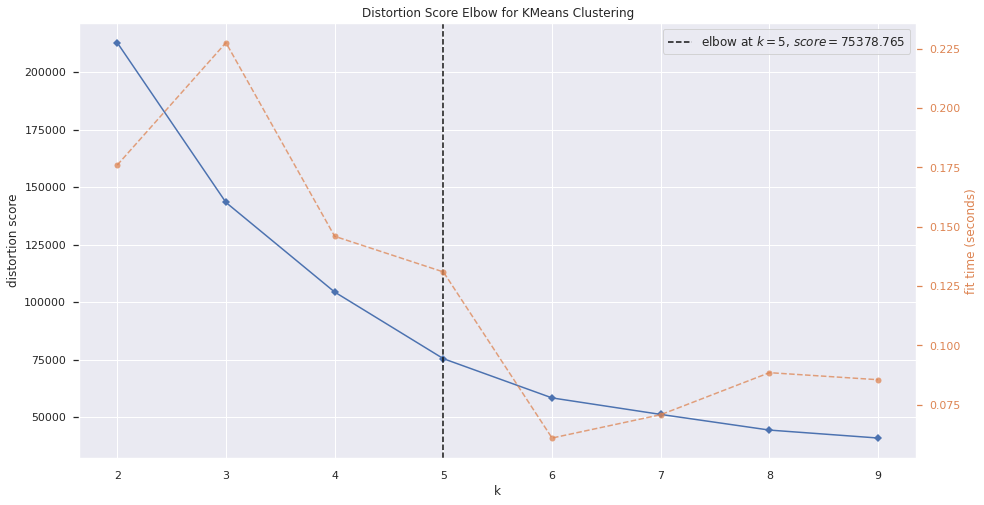

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

data= df[['Age' , 'Annual Income (k$)','Spending Score (1-100)']].iloc[: , :].values
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
data= df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
algorithm = KMeans(n_clusters = 4) 
algorithm.fit(data)
labels1 = algorithm.labels_
#centroids1 = algorithm.cluster_centers_

In [ ]:
df['label1'] =  labels1 
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label1
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
5,6,Female,22,17,76,0
6,7,Female,35,18,6,2
7,8,Female,23,18,94,0
8,9,Male,64,19,3,2
9,10,Female,30,19,72,0


In [ ]:
copy_df=df[df['label1']==0]
copy_df[['Age','Spending Score (1-100)']].describe()

,Age,Spending Score (1-100)
count,57.000000,57.000000
mean,30.175439,82.350877
std,5.535995,8.913255
min,18.000000,68.000000
25%,27.000000,75.000000
50%,30.000000,81.000000
75%,35.000000,90.000000
max,40.000000,99.000000


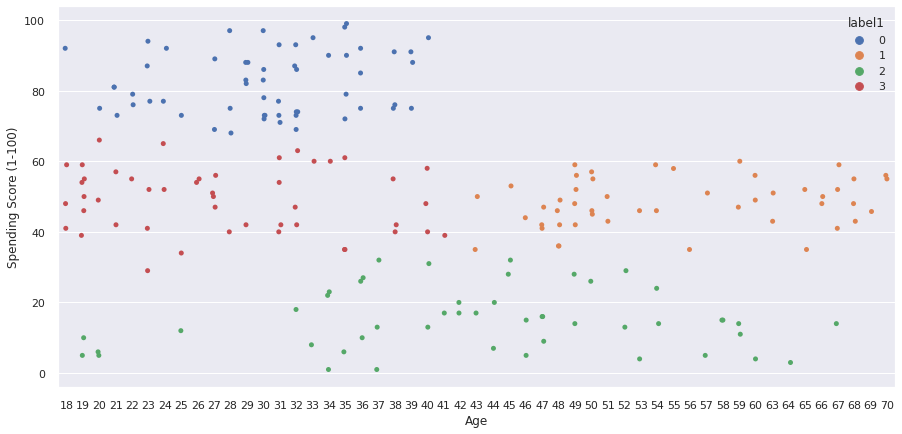

In [ ]:
plt.figure(figsize = (15 , 7) )
sns.stripplot(x='Age', y='Spending Score (1-100)', data=df,hue='label1', jitter=True)



In [ ]:
data= df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
algorithm = KMeans(n_clusters = 5) 
algorithm.fit(data)
labels2 = algorithm.labels_
#centroids1 = algorithm.cluster_centers_
df['label2'] =  labels2
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label1,label2
0,1,Male,19,15,39,3,1
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,2,1
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,3,1
5,6,Female,22,17,76,0,4
6,7,Female,35,18,6,2,1
7,8,Female,23,18,94,0,4
8,9,Male,64,19,3,2,1
9,10,Female,30,19,72,0,4


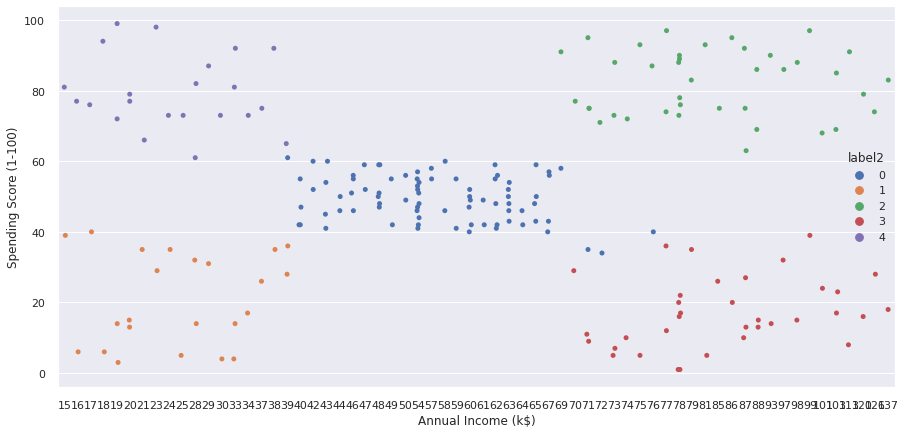

In [ ]:
plt.figure(figsize = (15 , 7) )
sns.stripplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df,hue='label2', jitter=True)

In [ ]:
data= df[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
algorithm = KMeans(n_clusters = 5) 
algorithm.fit(data)
labels3 = algorithm.labels_
#centroids1 = algorithm.cluster_centers_
df['label3'] =  labels3
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label1,label2,label3
0,1,Male,19,15,39,3,1,0
1,2,Male,21,15,81,0,4,3
2,3,Female,20,16,6,2,1,0
3,4,Female,23,16,77,0,4,3
4,5,Female,31,17,40,3,1,0
5,6,Female,22,17,76,0,4,3
6,7,Female,35,18,6,2,1,0
7,8,Female,23,18,94,0,4,3
8,9,Male,64,19,3,2,1,0
9,10,Female,30,19,72,0,4,3


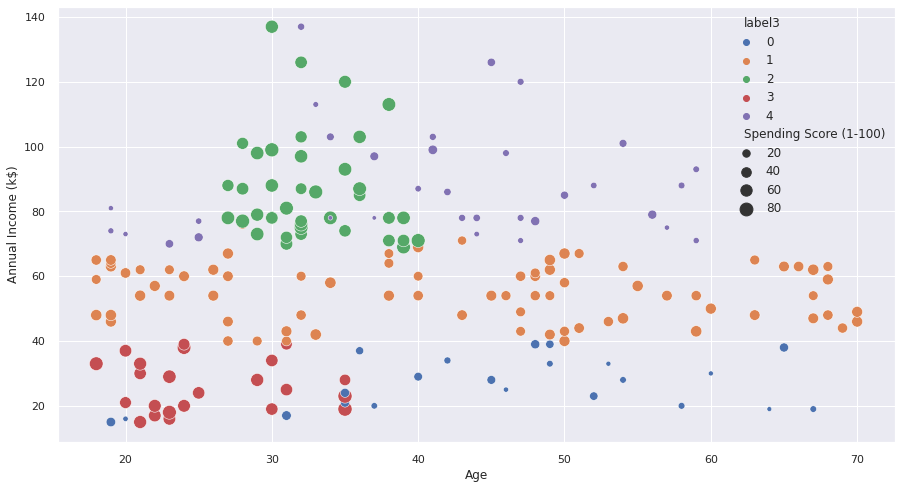

In [ ]:
sns.scatterplot(x='Age',y='Annual Income (k$)',hue='label3',size='Spending Score (1-100)',data=df,palette='deep',sizes=(20,200))



In [ ]:
algorithm.predict([[19,15,39]])

array([0], dtype=int32)

In [ ]:
data= df[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

df['label3_pred']=algorithm.predict(data)




In [ ]:
df[['label3','label3_pred']]

,label3,label3_pred
0,0,0
1,3,3
2,0,0
3,3,3
4,0,0
...,...,...
195,2,2
196,4,4
197,2,2
198,4,4


In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df=pd.read_csv('/content/Mall_Customers.csv')
data= df[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
data.shape

(200, 3)

Text(0, 0.5, 'Euclidean distances')

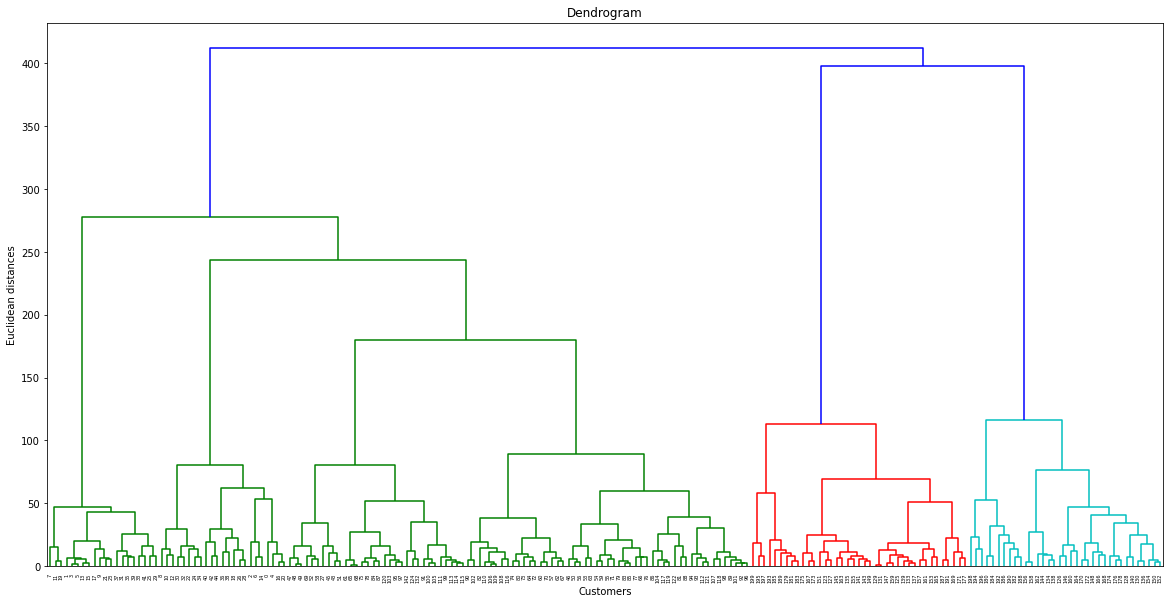

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
cluster4=linkage(data, method='ward')
dendrogram = dendrogram(cluster4)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

(199, 4)


Text(0, 0.5, 'Euclidean distances')

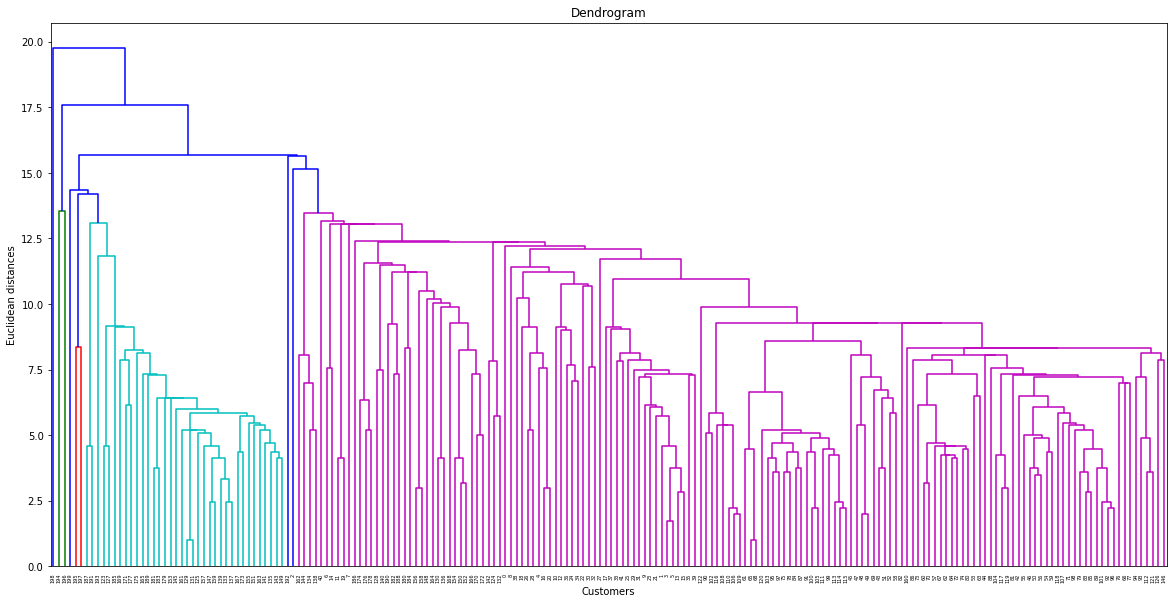

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
cluster1=linkage(data,method='single')
print(cluster.shape)
dendrogram = dendrogram(cluster1)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

Text(0, 0.5, 'Euclidean distances')

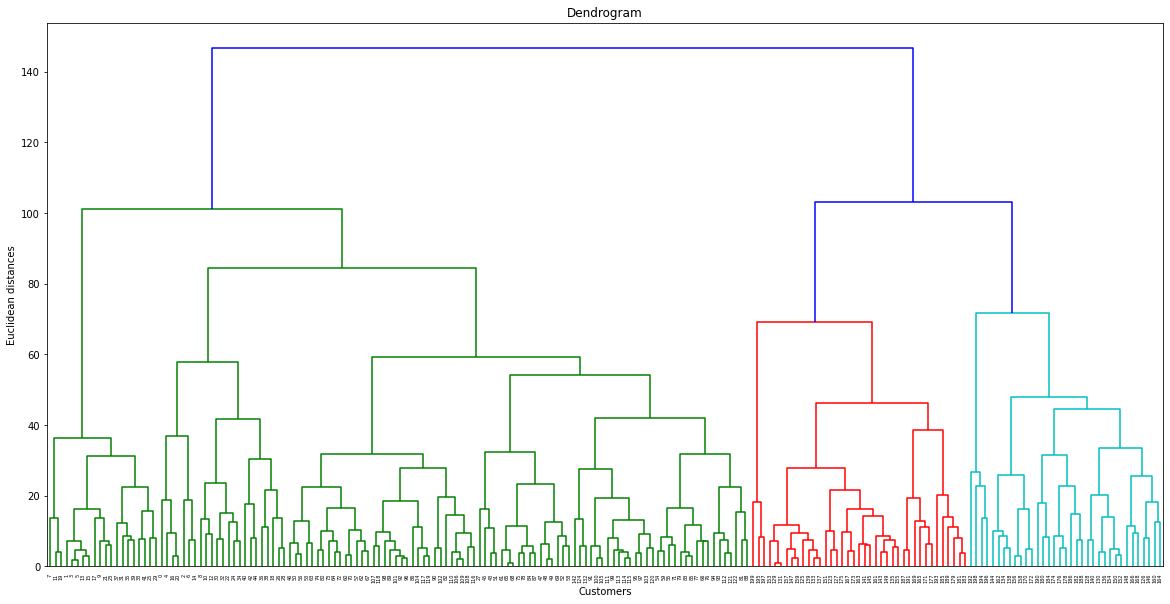

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
cluster2=linkage(data,method='complete')

dendrogram = dendrogram(cluster2)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

Text(0, 0.5, 'Euclidean distances')

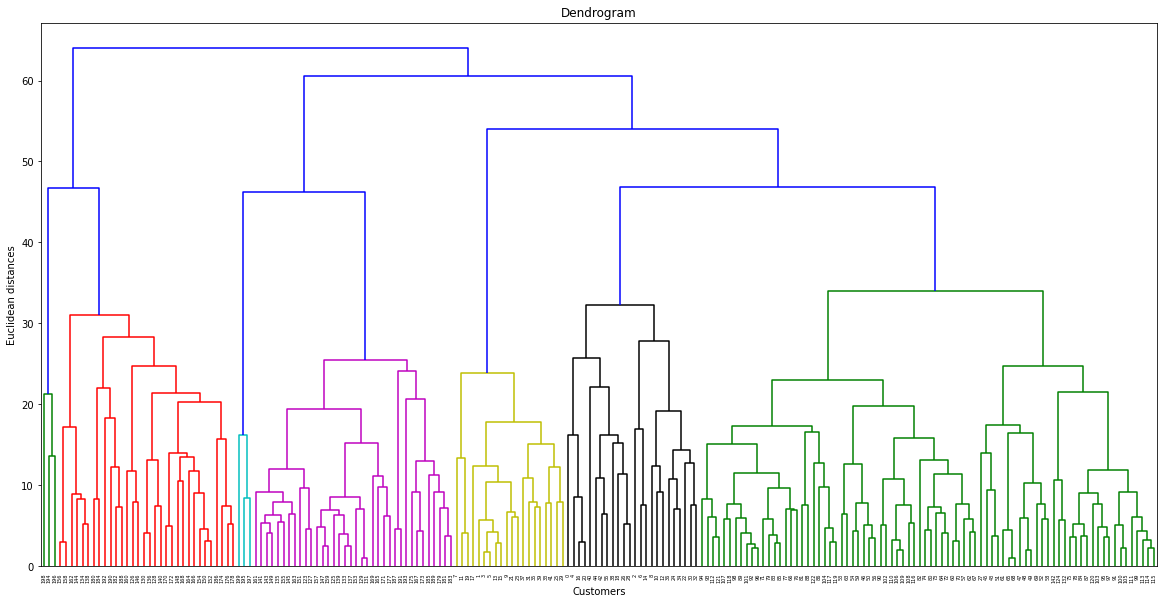

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
cluster3=linkage(data,method='average')

dendrogram = dendrogram(cluster3)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster_label=cluster_model.fit_predict(data)
df['label4']=cluster_label
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label4
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


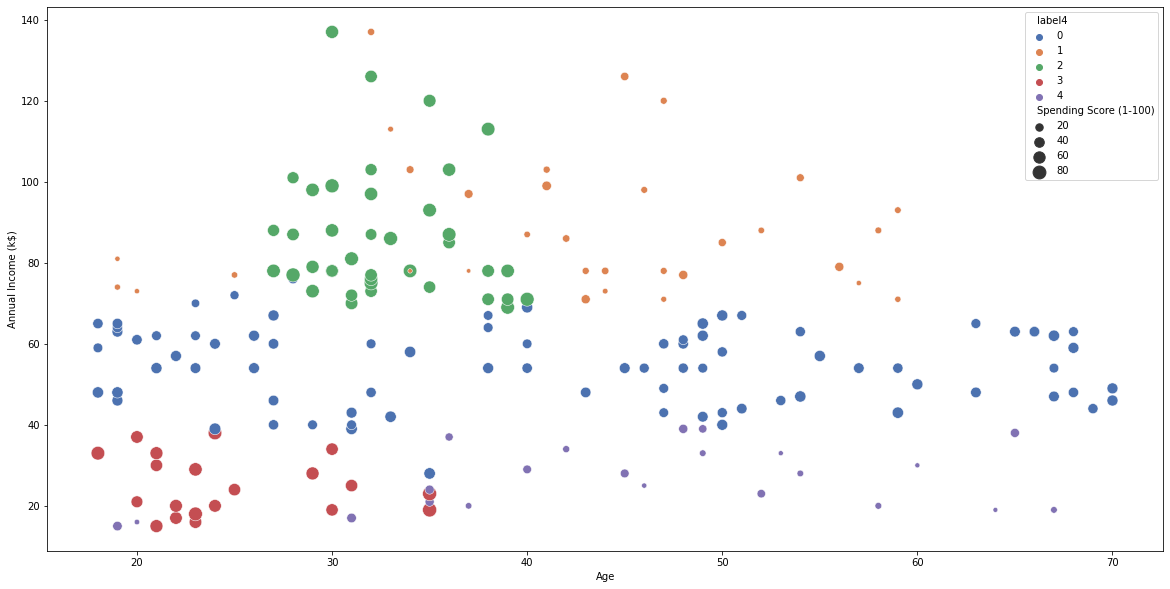

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
sns.scatterplot(x='Age',y='Annual Income (k$)',hue='label4',size='Spending Score (1-100)',data=df,palette='deep',sizes=(20,200))

In [ ]:
from sklearn.cluster import KMeans
import numpy as np


data = np.array([[185, 60], [180, 62], [185, 70],[165,63], [155,68], [170, 75],[175,80]])

km=KMeans(n_clusters=3)
km.fit(data)
print(km.labels_)
print(km.predict([[7,7]]))

[1 1 1 0 0 2 2]
[0]


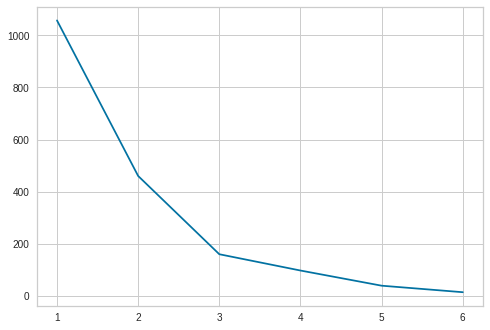

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


data = np.array([[185, 60], [180, 62], [185, 70],[165,63], [155,68], [170, 75],[175,80]])
temp=[]
for i in range(1,7):
  km=KMeans(n_clusters=i)
  km.fit(data)
  temp.append(km.inertia_)
plt.plot(range(1,7), temp)


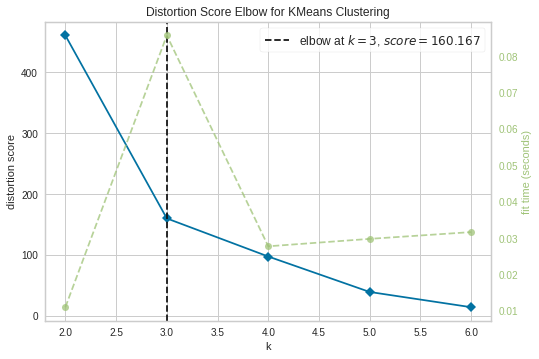

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
data = np.array([[185, 60], [180, 62], [185, 70],[165,63], [155,68], [170, 75],[175,80]])

visualizer = KElbowVisualizer(KMeans(), k=(2,7))
visualizer.fit(data) 
visualizer.show() 

Text(0, 0.5, 'weight')

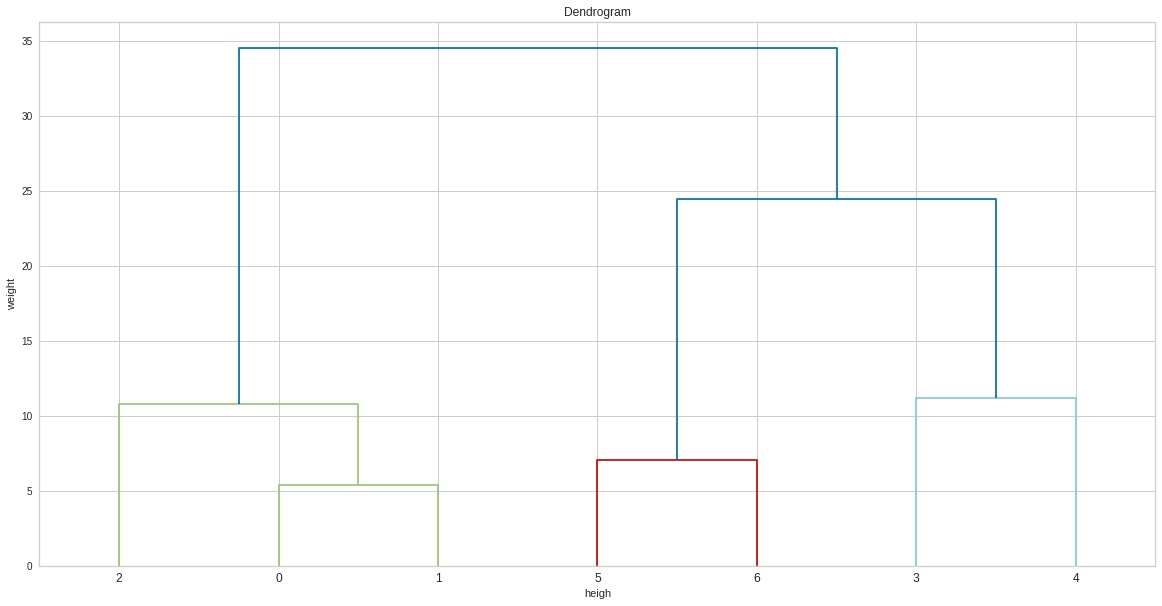

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
data = np.array([[185, 60], [180, 62], [185, 70],[165,63], [155,68], [170, 75],[175,80]])
plt.figure(figsize=(20,10))
cluster=linkage(data,method='ward')

dendrogram(cluster)
plt.title('Dendrogram')
plt.xlabel('heigh')
plt.ylabel('weight')

In [ ]:
df=pd.read_csv('/content/food.csv')
df.describe()

,carbohydrate,protein,fat,salt
count,4198.000000,4198.000000,4198.000000,4199.000000
mean,32.689840,8.536604,10.830823,571.767087
std,30.411111,10.592122,16.173251,340.816065
min,0.000000,0.000000,0.000000,1.000000
25%,12.000000,2.300000,2.100000,283.500000
50%,28.000000,5.000000,6.985000,589.000000
75%,44.000000,11.000000,15.000000,880.000000
max,364.710000,247.000000,308.000000,1533.000000


In [ ]:
df.isnull().sum()

carbohydrate    1
protein         1
fat             1
salt            0
dtype: int64

In [ ]:
df=df.dropna(axis=0)

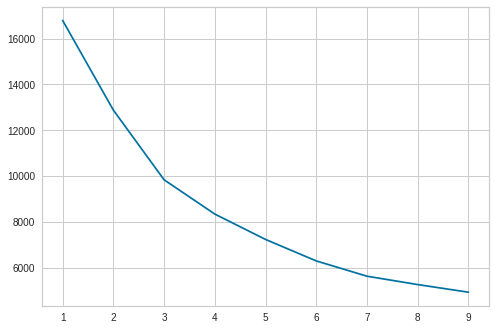

In [ ]:
data=df[['carbohydrate','protein','fat','salt']]
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
data=s.fit_transform(data)

temp=[]
for i in range(1,10):
  km=KMeans(n_clusters=i)
  km.fit(data)
  temp.append(km.inertia_)
plt.plot(range(1,10),temp)

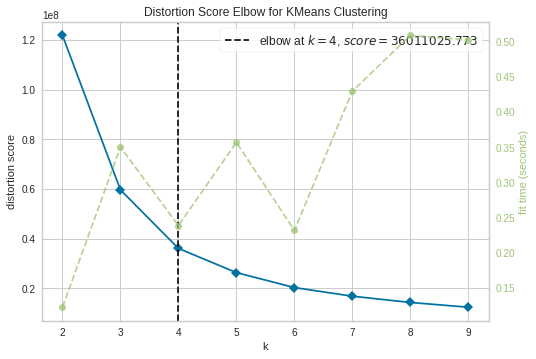

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
data = df[['carbohydrate','protein','fat','salt']].iloc[: , :].values

visualizer = KElbowVisualizer(KMeans(), k=(2,10))
visualizer.fit(data) 
visualizer.show() 

In [ ]:
data=df[['carbohydrate','protein','fat','salt']].iloc[: , :].values
km=KMeans(n_clusters=4)
km.fit(data)
df['label1']=km.labels_
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,carbohydrate,protein,fat,salt,label1
0,97.0,31.0,20.0,1174,3
1,63.0,18.0,9.0,1040,3
2,37.0,13.0,16.0,1291,3
3,60.0,9.0,19.0,1011,3
4,56.0,15.0,11.0,860,3


In [ ]:
df[['label1']].value_counts()

label1
3         1236
2         1004
0          995
1          963
dtype: int64

Text(0.5, 1.0, 'Dendrogram')

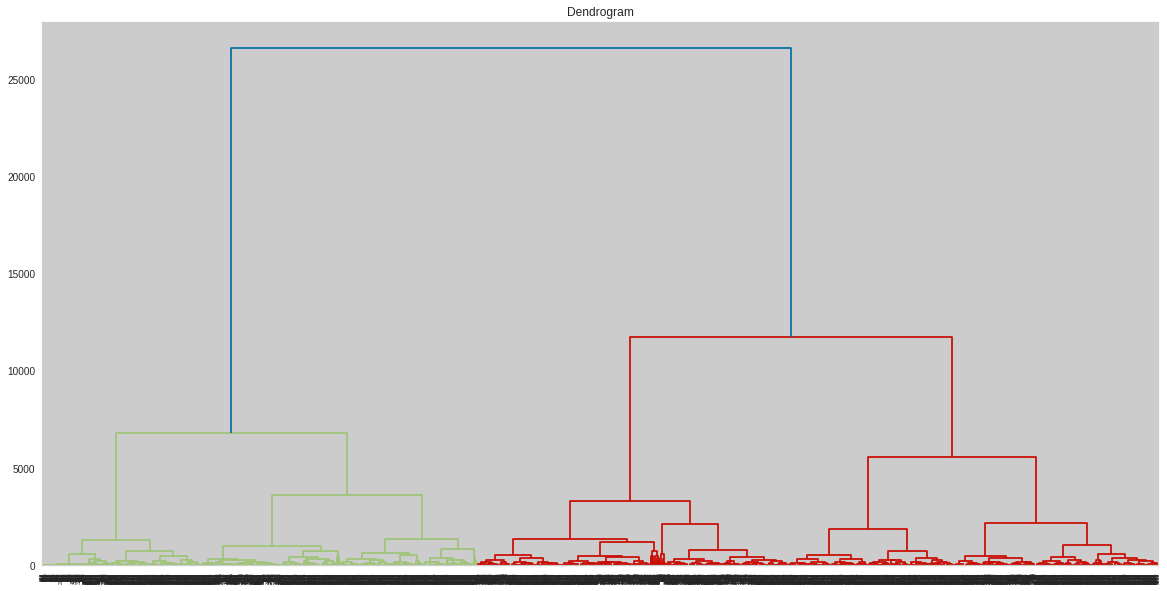

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
data = df[['carbohydrate','protein','fat','salt']].iloc[: , :].values
plt.figure(figsize=(20,10))
cluster=linkage(data,method='ward')

dendrogram(cluster)
plt.title('Dendrogram')


In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_label=cluster_model.fit_predict(data)
df['label2']=cluster_label
df[['label2']].value_counts()

label2
0         1635
1         1396
2         1167
dtype: int64